In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 98.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sayedgamal99/smoke-fire-detection-yolo")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/smoke-fire-detection-yolo


In [5]:
from ultralytics import YOLO
import numpy as np
import pandas as pd
import os
import shutil
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


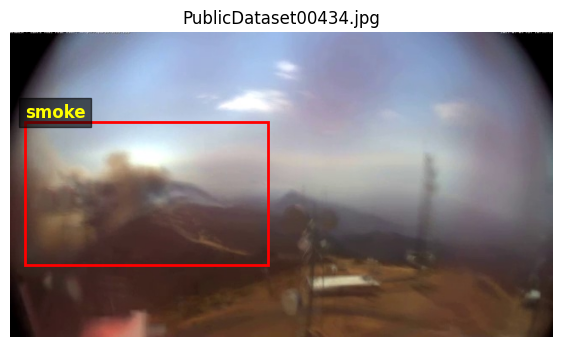

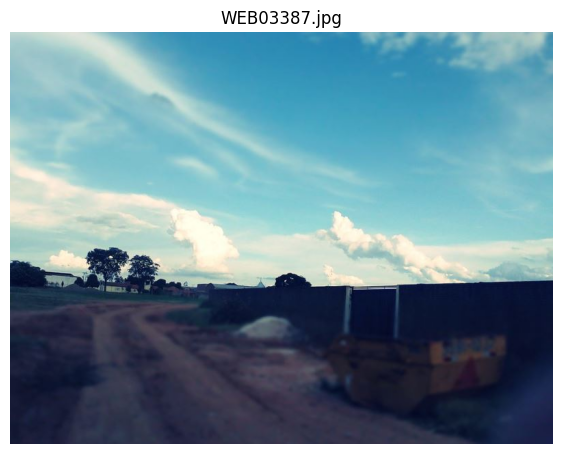

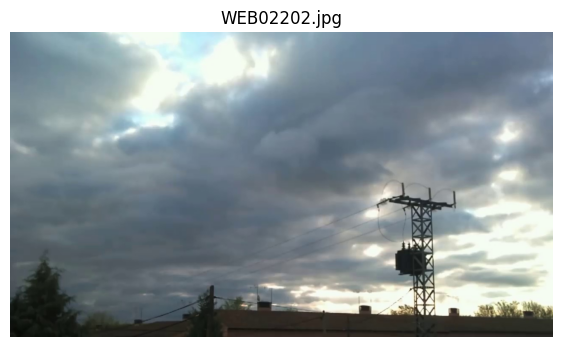

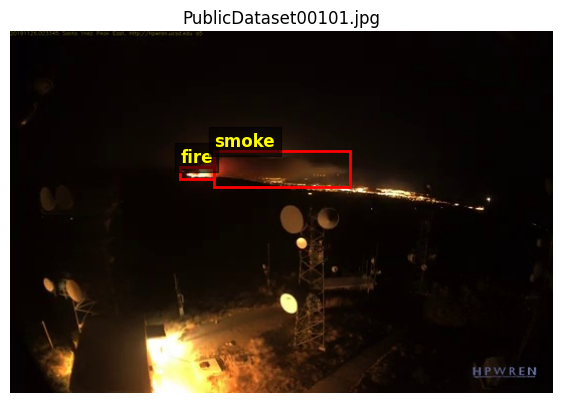

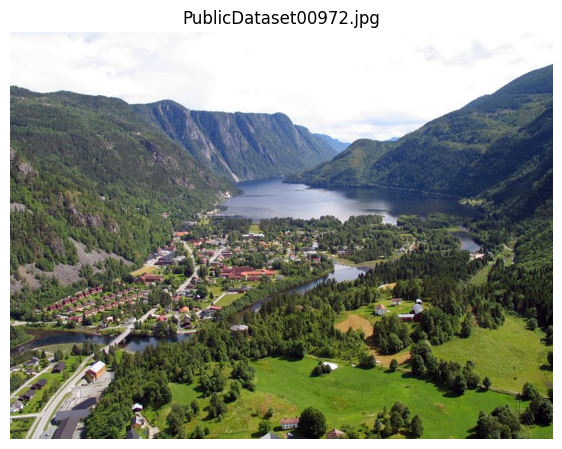

In [6]:
images_path = "/kaggle/input/smoke-fire-detection-yolo/data/train/images"
labels_path = "/kaggle/input/smoke-fire-detection-yolo/data/train/labels"   

class_names = ['smoke', 'fire']

images_list = os.listdir(images_path)

for i in range(5):
    random_image = random.choice(images_list)
    base_name = os.path.splitext(random_image)[0]
    label_file = base_name + ".txt"

    img_path = os.path.join(images_path, random_image)
    label_path = os.path.join(labels_path, label_file)

    img = plt.imread(img_path)
    h, w = img.shape[0], img.shape[1]

    fig, ax = plt.subplots(1, figsize=(7,7))
    ax.imshow(img)

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            lines = f.readlines()

        for line in lines:
            cls, xc, yc, bw, bh = map(float, line.split())

            xc *= w
            yc *= h
            bw *= w
            bh *= h

            x1 = xc - bw/2
            y1 = yc - bh/2

            rect = patches.Rectangle(
                (x1, y1), bw, bh,
                linewidth=2,
                edgecolor='red',
                facecolor='none'
            )
            ax.add_patch(rect)

            ax.text(
                x1,
                y1 - 5,
                class_names[int(cls)],
                color="yellow",
                fontsize=12,
                weight='bold',
                bbox=dict(facecolor='black', alpha=0.6)
            )

    else:
        print(f"No label found for: {random_image}")

    plt.axis("off")
    plt.title(random_image)
    plt.show()

In [7]:
model = YOLO("yolo12n.pt")

model.train(
    data="/kaggle/input/data-input/data.yaml",
    epochs=100,
    patience=20,
    batch=8,
    imgsz=640,
    device=0,
    lr0=0.001,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    hsv_h=0.015,
    hsv_s=0.5,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    shear=0.0,
    flipud=0.0,
    fliplr=0.5,
    mosaic=0.8,
    mixup=0.0,
    val=True
)

Ultralytics 8.3.235 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/data-input/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.5, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=0.8, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pos

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       3094       3917      0.748      0.701      0.769      0.459
                 smoke       1545       1751      0.798      0.769      0.832       0.53
                  fire        875       2166      0.697      0.634      0.707      0.389
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /kaggle/working/runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ef3629689d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [11]:
!zip -r train_folder.zip /kaggle/working/runs/detect/train


  adding: kaggle/working/runs/detect/train/ (stored 0%)
  adding: kaggle/working/runs/detect/train/confusion_matrix.png (deflated 31%)
  adding: kaggle/working/runs/detect/train/BoxP_curve.png (deflated 12%)
  adding: kaggle/working/runs/detect/train/train_batch1.jpg (deflated 15%)
  adding: kaggle/working/runs/detect/train/BoxR_curve.png (deflated 12%)
  adding: kaggle/working/runs/detect/train/labels.jpg (deflated 37%)
  adding: kaggle/working/runs/detect/train/val_batch2_pred.jpg (deflated 16%)
  adding: kaggle/working/runs/detect/train/train_batch158672.jpg (deflated 20%)
  adding: kaggle/working/runs/detect/train/BoxPR_curve.png (deflated 11%)
  adding: kaggle/working/runs/detect/train/args.yaml (deflated 53%)
  adding: kaggle/working/runs/detect/train/weights/ (stored 0%)
  adding: kaggle/working/runs/detect/train/weights/last.pt (deflated 11%)
  adding: kaggle/working/runs/detect/train/weights/best.pt (deflated 11%)
  adding: kaggle/working/runs/detect/train/val_batch1_pred.jpg 